# 2) Data Understanding
## Collect initial Data

*Acquire the data (or access to the data) listed in the project resources. This initial collection includes data
loading, if necessary for data understanding. For example, if you use a specific tool for data understanding,
it makes perfect sense to load your data into this tool. This effort possibly leads to initial data preparation steps.
Note: if you acquire multiple data sources, integration is an additional issue, either here or in the later
data preparation phase.*

In [8]:
import Helper_funcs
import os

Define the path for the data source

In [9]:
# This gets the current path and navigates one folder higher to the project level path
# this also assumes you have notebooks in a notebook folder
path = os.path.dirname(os.getcwd())
# name of the file including the folder where it is stored in
filename= "data\knmi_data.txt"
# Joins the path of the filename and the project path, this is OS-agnostic and will work on linux, MACOS and windows
data_source = os.path.join(path,filename)

In [10]:
columns = ['station', 'datum', 'T_gem', 'T_min', 'T_max', 'Neerslag']
df = Helper_funcs.read_csv(data_source,columns)

### Initial data collection report

*List the dataset(s) acquired, together with their locations, the methods used to acquire them, and any
problems encountered. Record problems encountered and any resolutions achieved. This will aid with
future replication of this project or with the execution of similar future projects.*

## Describe Data

*Examine the “gross” or “surface” properties of the acquired data and report on the results.*

- Data is available as a csv file but saved in a .txt format
- Data includes comments denoted by a # symbol per line.
- Actual data starts on line 16
- Data includes the geolocation of the station at which the measurement was performed.
- inlcuded inthe comments are the format in which the data has been stored.
- dates are denoted as YYYYMMDD = Datum (YYYY=jaar MM=maand DD=dag)
- temperatures ae measured in 0.1 degrees celsius
- rainfall is measured per 0.1mm
- column name references are included in the comments
- where rainfall is less than 0.05, a value of -1 is assigned.

In [11]:
df.shape

(3656, 4)

In [12]:
# This displays the first number of rows passed in the parameters
df.head(20)

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01    -18    -38     11        15
        2011-02-02     29     11     40         3
        2011-02-03     52     30     80        14
        2011-02-04     90     61    109        16
        2011-02-05    114    107    120         0
        2011-02-06    104     85    114        -1
        2011-02-07     87     63    106         0
        2011-02-08     35    -31     82         0
        2011-02-09     20    -49     95         0
        2011-02-10     70     35     99        73
        2011-02-11     58     34     81        44
        2011-02-12     31      9     74       104
        2011-02-13     64     51     86         0
        2011-02-14     56     37     83        96
        2011-02-15     46     11     69        25
        2011-02-16     55      1    102        -1
        2011-02-17     22     -4     67         0
        2011-02-18      4     -5     12         0
        2011-02-19      4     -6     20         0
        2011-02-20    -11    -35     12         0

In [13]:
# This displays the last number of rows passed in the parameters
df.tail(20)

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2021-01-15      6     -5     18         0
        2021-01-16      5     -8     22        15
        2021-01-17     24     -6     66        11
        2021-01-18     41     13     60         4
        2021-01-19     74     43    105       119
        2021-01-20     88     65    109         0
        2021-01-21     73     42    111        80
        2021-01-22     36     -1     69        18
        2021-01-23     23     -2     59         4
        2021-01-24     10    -23     54         0
        2021-01-25      7    -52     53        34
        2021-01-26     36     16     61        14
        2021-01-27     40     10     66        30
        2021-01-28     37     23     53        59
        2021-01-29     57      0     95       122
        2021-01-30     -4    -42     16         0
        2021-01-31    -27    -64      7         0
        2021-02-01      0     -9      9         2
        2021-02-02     22      0     77        23
        2021-02-03     81     61     95       183

Get a statistical overview of the dataset

In [14]:
df.describe()

,T_gem,T_min,T_max,Neerslag
count,3656.000000,3656.000000,3656.000000,3656.000000
mean,105.027899,59.338074,148.262856,20.448578
std,61.939013,56.406605,73.191528,41.534217
min,-121.000000,-179.000000,-54.000000,-1.000000
25%,60.000000,19.000000,92.000000,0.000000
50%,103.000000,60.500000,147.000000,1.000000
75%,153.000000,103.000000,204.000000,22.000000
max,280.000000,198.000000,393.000000,556.000000


### Data Description report

*Describe the data that has been acquired, including the format of the data, the quantity of data (for
example, the number of records and fields in each table), the identities of the fields, and any other surface
features which have been discovered. Evaluate whether the data acquired satisfies the relevant requirements.*

- The dataset consists of 3656 rows and 4 columns
- each row represents a days measurements, thus we can conclude that the dataset consists of 3656 days data
- Columns Average, minimum and maximum all contain values below 0
- the lowest value in rainfall is -1 this correlates to the description as provided in the comments section
- the data is indexed by station number and date
- rainfall has a higher distribution to the 75percentile
- max rainfall varies greatly from the 75percentile

## Explore Data

*This task addresses data mining questions using querying, visualization, and reporting techniques. These
include distribution of key attributes (for example, the target attribute of a prediction task) relationships
between pairs or small numbers of attributes, results of simple aggregations, properties of significant
sub-populations, and simple statistical analyses. These analyses may directly address the data mining
goals; they may also contribute to or refine the data description and quality reports, and feed into the
transformation and other data preparation steps needed for further analysis.*

array([<Axes: xlabel='station,datum'>, <Axes: xlabel='station,datum'>,
       <Axes: xlabel='station,datum'>, <Axes: xlabel='station,datum'>],
      dtype=object)

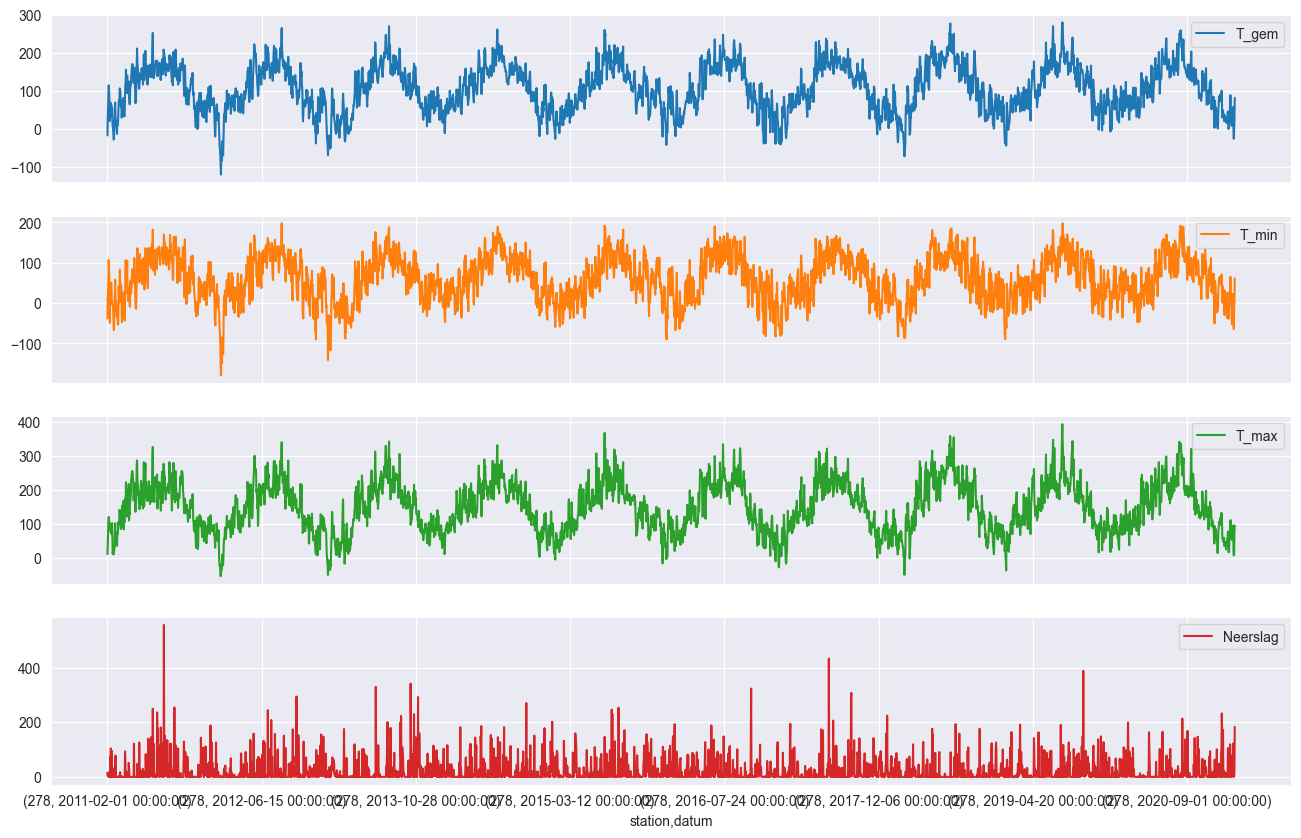

In [15]:
# Plot a line chart, fig size determines the size of the chart and subplots splits each line chart into its own individual chart
df.plot(figsize=(16,10),subplots=True)

Comments about discoveries based on this visualization
- the average,minimum and maximum temperatures have seasonality
- the average,minimum and maximum temperatures have a cyclical pattern
- there are minimal extreme outliers

<Axes: >

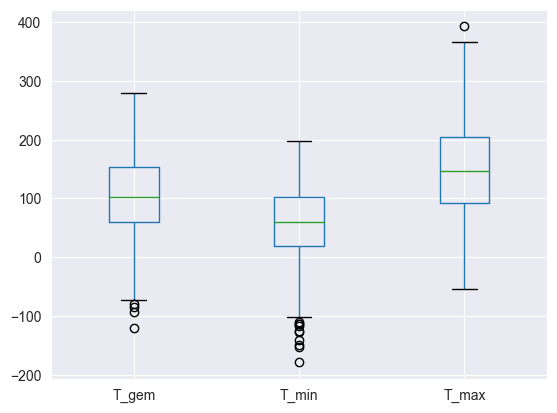

In [16]:
# columns can be specified using a list of string values that match the column names in the dataframe
df.boxplot(column=["T_gem","T_min","T_max"])

Comments about discoveries based on this visualization
- the 50% median box falls within range of the other columns, there is tus no major significant difference between the average,minimum and maximum readings in relation to each other.

<Axes: >

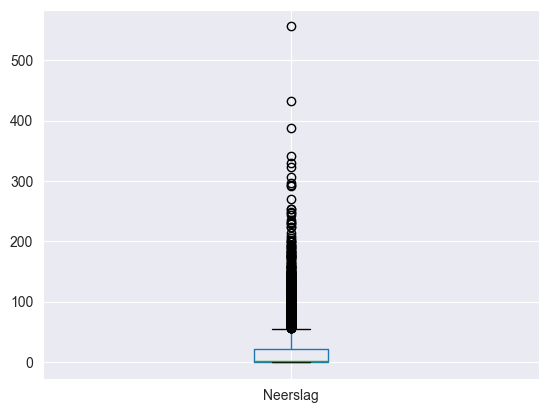

In [17]:
df.boxplot(column=["Neerslag"])

Comments about discoveries based on this visualization
- the main distribution lies close to zero and outliers can be extreme.

array([[<Axes: title={'center': 'T_gem'}>,
        <Axes: title={'center': 'T_max'}>],
       [<Axes: title={'center': 'T_min'}>, <Axes: >]], dtype=object)

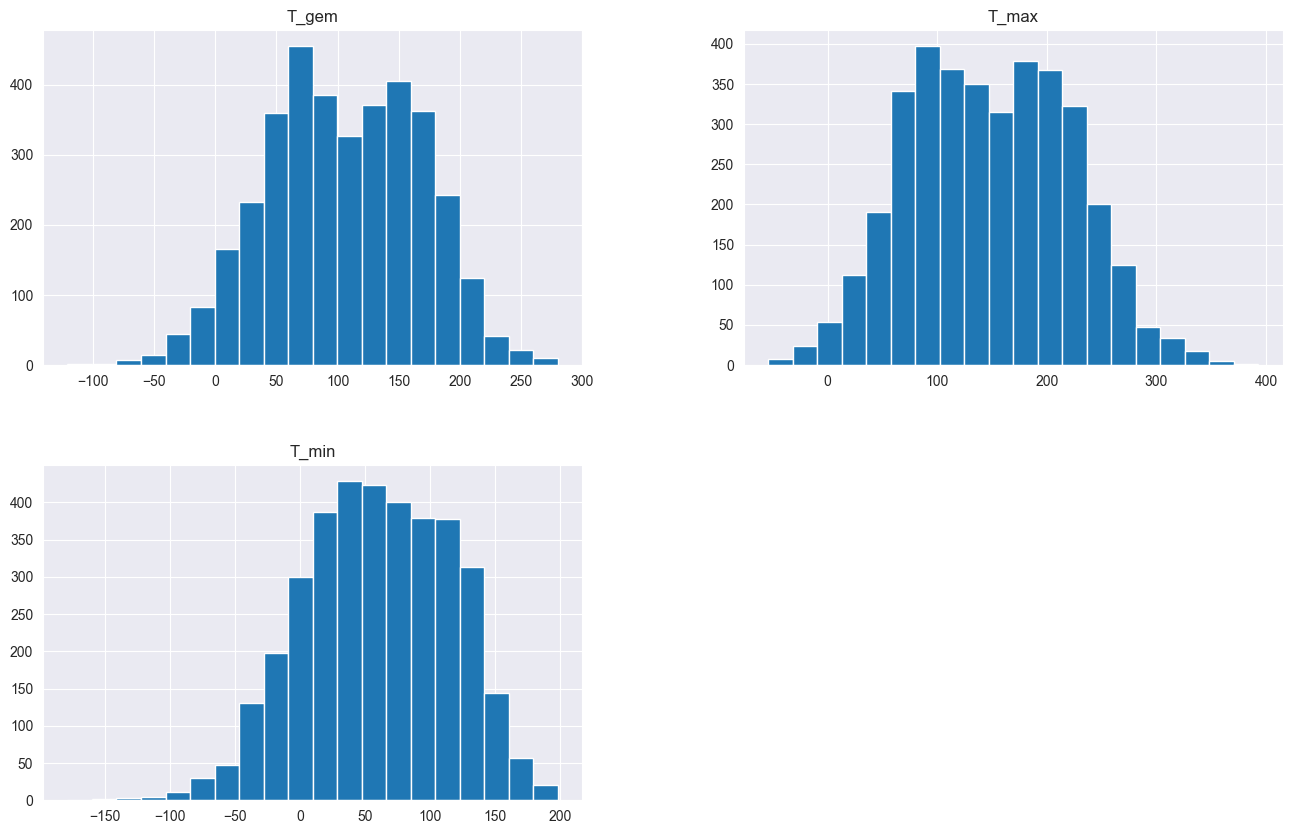

In [25]:
# plot a histogram, bin size determines the level of grouping that must be applied
df.hist(column=["T_gem","T_max","T_min"],figsize=(16,10),bins=20)

array([[<Axes: title={'center': 'Neerslag'}>]], dtype=object)

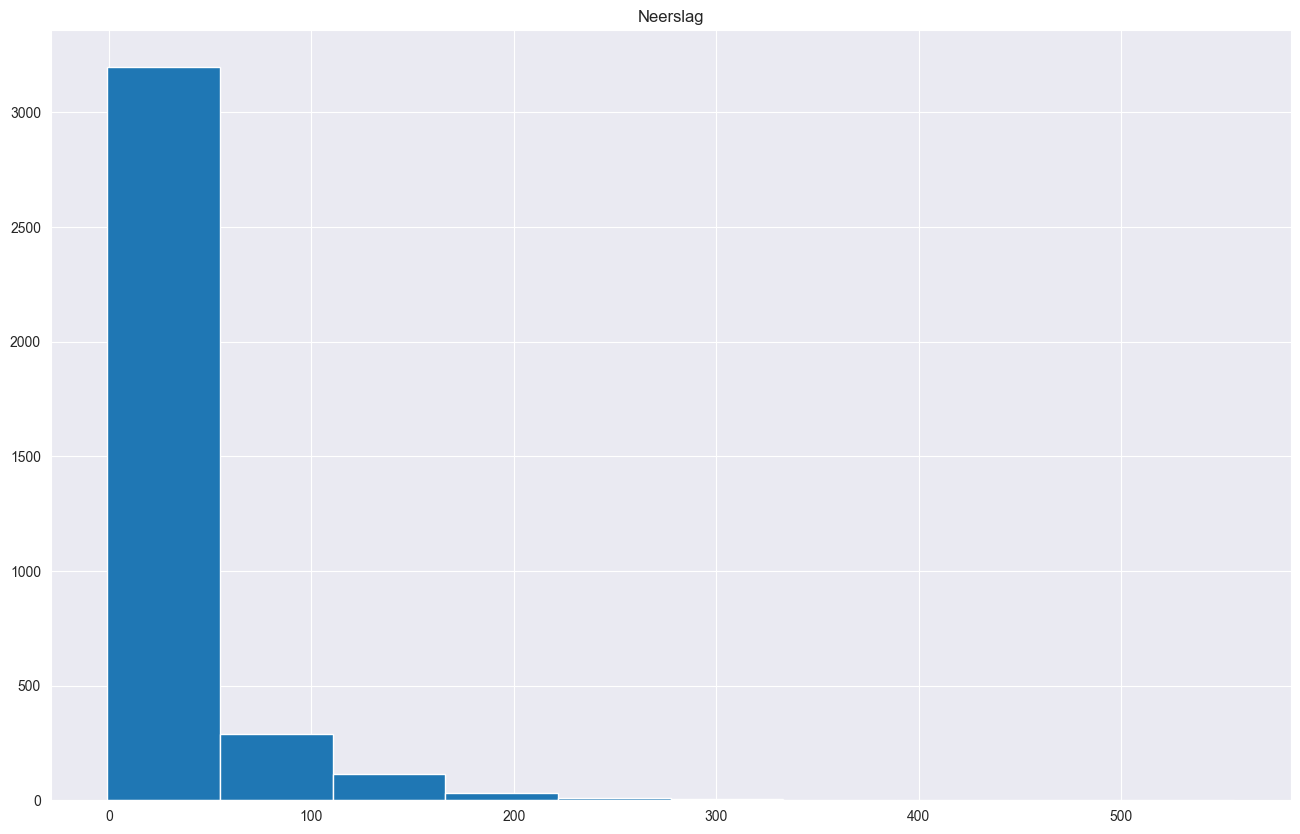

In [26]:
df.hist(column=["Neerslag"],figsize=(16,10),bins=10)

### Data exploration report

*Describe results of this task, including first findings or initial hypothesis and their impact on the remainder
of the project. If appropriate, include graphs and plots to indicate data characteristics that suggest further
examination of interesting data subsets.*

Distribution:
- rainfall has a high distribution in the 0-100 range
- majority of the distribution of average,minimum and maximum lies in the25-200 range

## Verify Data quality

*Examine the quality of the data, addressing questions such as: Is the data complete (does it cover all the
cases required)? Is it correct, or does it contain errors and, if there are errors, how common are they? Are
there missing values in the data? If so, how are they represented, where do they occur, and how common
are they?*

In [27]:
df.isnull().sum()

T_gem       0
T_min       0
T_max       0
Neerslag    0
dtype: int64

there are no null values in any of the columns

In [ ]:
df.shape

### Data quality report

*List the results of the data quality verification; if quality problems exist, list possible solutions. Solutions
to data quality problems generally depend heavily on both data and business knowledge.*

The data has 3656 4 columns as expected, with the average temperature, maximum temperature and minimum temperature, including rainfall.
The data set has no nulls as expected
THe temperatures are too extreme to be in celsius and needs to be modified to truly represent its celsius form of.